Importing Libraries

In [1]:
# Basic libraries
import numpy as np
import matplotlib.pyplot as plt
# data processing
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
# for building and training CNN model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout,BatchNormalization
from keras.regularizers import l2
from keras import models
from keras import layers
# for open CV
import cv2
# to manage file path while loading image datasets
import os
# for handling image loading and resizing
from PIL import Image
# Evaluation
from sklearn.metrics import classification_report, confusion_matrix
# Hand detection in live webcame

import mediapipe as mp

Loading Images and Data Preprocessing

In [2]:
dataset_path = 'TeachableDataset'

image_size = (64,64)
categories = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'f', 'g', 'h', 'i', 'j', 'k', 
              'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
# categories = ['A','B','C','D','E','F','G','H','I','J','K','L','M', 'N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
# categories = ['I','M', 'N','S','T']
# categories = ['A','B','C','D','E','F','G','H','I','J','K','L','M','S','N']
categories = ['A','B','C','D','E','F','G','H','I','J']

data = []
labels = []

for category in categories:
    category_path = os.path.join(dataset_path, category)
    label = categories.index(category)  # index of the category

    for img_file in os.listdir(category_path):
        img_path = os.path.join(category_path, img_file) # get full image directory
        
        # Open the image, resize, and convert to array
        img = Image.open(img_path).convert('L')  # Convert to grayscale
        img = img.resize(image_size)
        img_array = np.array(img)
        
        data.append(img_array)
        labels.append(label)

data = np.array(data)
labels = np.array(labels)

data = data / 255.0 # normalize image data from range(0 to 255) to range(0 to 1)

data = data.reshape(-1, image_size[0], image_size[1], 1) # reshape the representation of image from 2D array to 3D array (in grayscale-0to255)

labels = to_categorical(labels, num_classes=len(categories)) # converting indexes of label to binary vector

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2,shuffle = True, random_state=42)

batch_size = 32

print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")

Training data shape: (3999, 64, 64, 1)
Testing data shape: (1000, 64, 64, 1)


In [4]:
# import os
# import numpy as np
# from PIL import Image
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.utils import to_categorical

# # Dataset and categories
# dataset_path = '../SignImage48x48'
# image_size = (64, 64)
# categories = ['I','M', 'N','S','T']

# # Initialize data and labels lists
# data = []
# labels = []

# # Load and preprocess images
# for category in categories:
#     category_path = os.path.join(dataset_path, category)
#     label = categories.index(category)  # index of the category

#     for img_file in os.listdir(category_path):
#         img_path = os.path.join(category_path, img_file)  # Get full image directory
        
#         # Open the image, resize, and convert to array
#         img = Image.open(img_path).convert('L')  # Convert to grayscale
#         img = img.resize(image_size)
#         img_array = np.array(img)
        
#         data.append(img_array)
#         labels.append(label)

# # Convert to numpy arrays and normalize the data
# data = np.array(data)
# labels = np.array(labels)

# data = data / 255.0  # Normalize image data to the range 0 to 1
# data = data.reshape(-1, image_size[0], image_size[1], 1)  # Reshape to 4D array (samples, width, height, channels)

# # Convert labels to one-hot encoding
# labels = to_categorical(labels, num_classes=len(categories))

# # Split the data into training and testing sets
# x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# # Create an ImageDataGenerator for data augmentation
# datagen = ImageDataGenerator(
#     rotation_range=10,  # Random rotation up to 30 degrees
#     width_shift_range=0.1,  # Random horizontal shift
#     height_shift_range=0.1,  # Random vertical shift
#     shear_range=0.1,  # Random shear
#     zoom_range=0.1,  # Random zoom
#     horizontal_flip=True,  # Random horizontal flip
#     vertical_flip=True,  # Random vertical flip
#     fill_mode='nearest',  # Fill missing pixels with the nearest value
#     brightness_range=[0.8, 1.2]  # Random brightness adjustment
# )

# # Fit the generator on your training data
# datagen.fit(x_train)

# # Create a generator to yield augmented batches during training
# batch_size = 128
# train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)

# # Example output
# print(f"Training data shape: {x_train.shape}")
# print(f"Testing data shape: {x_test.shape}")

Building CNN Models

In [3]:
model = Sequential()

# First Convolutional Block
model.add(Conv2D(32, (3, 3), strides=1, padding='same', activation='relu', input_shape=(64, 64, 1)))
# model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Second Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.3))  # Increased dropout rate

# Third Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.3))  # Added dropout layer after this block

# Flattening and Dense Layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.4))  # Increased dropout rate

# Output Layer
num_classes = len(categories)
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
# from tensorflow.keras.optimizers import Adam
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 9, 9, 64)       │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        73,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 671,370 (2.56 MB)

 Trainable params: 671,370 (2.56 MB)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [4]:
history = model.fit(x_train,y_train, epochs=15, batch_size=128, validation_data=(x_test,y_test), verbose=1,shuffle = True)

Epoch 1/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 160ms/step - accuracy: 0.1121 - loss: 2.2749 - val_accuracy: 0.4150 - val_loss: 1.6218
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - accuracy: 0.5482 - loss: 1.3002 - val_accuracy: 0.7540 - val_loss: 0.7472
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - accuracy: 0.8514 - loss: 0.4818 - val_accuracy: 0.9590 - val_loss: 0.1407
Epoch 4/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - accuracy: 0.9602 - loss: 0.1439 - val_accuracy: 0.9220 - val_loss: 0.2181
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - accuracy: 0.9537 - loss: 0.1459 - val_accuracy: 0.9820 - val_loss: 0.0507
Epoch 6/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - accuracy: 0.9916 - loss: 0.0350 - val_accuracy: 0.9980 - val_loss: 0.0134
Epoch 7/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - accuracy: 0.9970 - loss: 0.0096 - val_accuracy: 0.9880 - val_loss: 0.0368
Epoch 8/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.9936 - loss: 0.0272 - val_accuracy: 0.

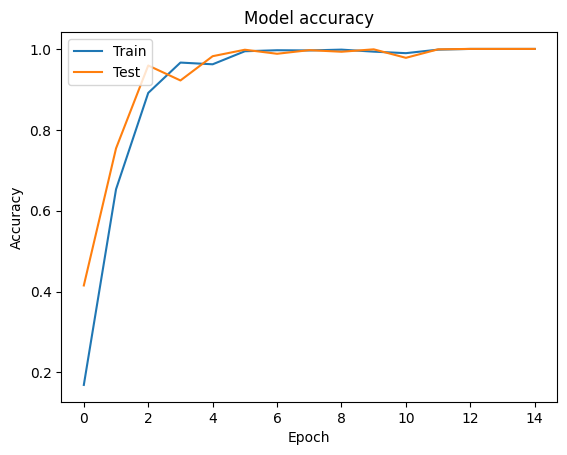

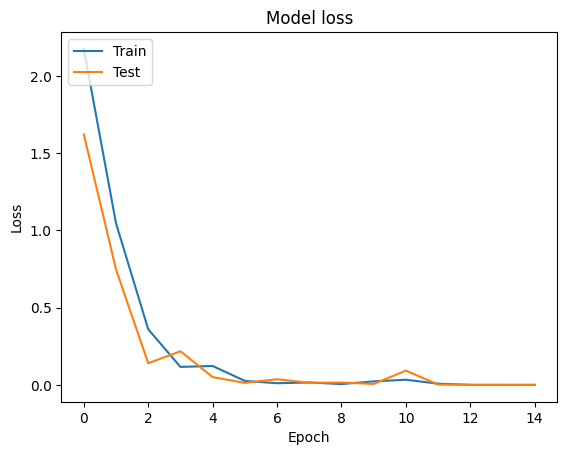

In [5]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Evaluate / Test the Model on Test Data (20% of data)

In [6]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

predictions = model.predict(x_test)

predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=categories))

print("Confusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes))
model.save('asl.h5')

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 1.0000 - loss: 6.3347e-04
Test Accuracy: 1.0000
Test Loss: 0.0004
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       109
           B       1.00      1.00      1.00       104
           C       1.00      1.00      1.00        97
           D       1.00      1.00      1.00       103
           E       1.00      1.00      1.00       102
           F       1.00      1.00      1.00       101
           G       1.00      1.00      1.00        86
           H       1.00      1.00      1.00       102
           I       1.00      1.00      1.00        98
           J       1.00      1.00      1.00        98

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Confusion Matrix:
[[109   0   0   0   0   0   0   0   0   0]
 [  0 104   0   0   0   0   0   0   0   0]
 [  0   0  97   0   0   0   0   0   0   0]
 [  0   0   0 103   0   0   0   0   0   0]
 [  0   0   0   0 102   0   

Setup Webcam using OpenCV for Real time detection

In [7]:
import cv2
import mediapipe as mp
import numpy as np
from tensorflow.keras.models import load_model

# Load your model and categories
model = load_model('asl.h5')  # Replace with your model's path
# categories = ['A','I','M', 'N','S','T'] # Replace with your actual categories

# Initialize Mediapipe hand detection
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(max_num_hands=1,min_detection_confidence=0.7, min_tracking_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    if not ret:
        break

    frame = cv2.flip(frame, 1)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(rgb_frame)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            # Draw hand landmarks
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            
            # Get the bounding box of the hand
            x_min = int(min([lm.x for lm in hand_landmarks.landmark]) * frame.shape[1])
            x_max = int(max([lm.x for lm in hand_landmarks.landmark]) * frame.shape[1])
            y_min = int(min([lm.y for lm in hand_landmarks.landmark]) * frame.shape[0])
            y_max = int(max([lm.y for lm in hand_landmarks.landmark]) * frame.shape[0])

            # Ensure bounding box is within frame dimensions
            x_min = max(x_min, 0)
            x_max = min(x_max, frame.shape[1])
            y_min = max(y_min, 0)
            y_max = min(y_max, frame.shape[0])
            
            # Crop the hand from the frame
            hand_crop = frame[y_min:y_max, x_min:x_max]
            
            if hand_crop.size > 0:
                try:
                    # Convert to grayscale
                    gray = cv2.cvtColor(hand_crop, cv2.COLOR_BGR2GRAY)
                    
                    # Resize to model input size (64x64)
                    resized = cv2.resize(gray, (64, 64))
                    
                    # Normalize and reshape
                    normalized = resized / 255.0
                    reshaped = np.reshape(normalized, (1, 64, 64, 1))
                    
                    # Predict the class of the hand
                    predictions = model.predict(reshaped)
                        
                    predicted_class = np.argmax(predictions[0])
                        
                    # Get the label from the categories list
                    # label = categories[predicted_class]
                    label = categories[predictions.argmax()]
                    print(label)
                    # Define text properties
                    font_scale = 2   # Increase font size
                    font_color = (255, 255, 255)  # White text
                    thickness = 3   # Increase thickness
                    background_color = (0, 0, 0)  # Black background

                    # Get the size of the text box
                    text_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)[0]
                        
                    # Set the position for the text (bottom center)
                    text_x = int((frame.shape[1] - text_size[0]) / 2)
                    text_y = frame.shape[0] - 10
                        
                    # Draw the black rectangle background
                    cv2.rectangle(frame, (text_x - 10, text_y - text_size[1] - 10), 
                                (text_x + text_size[0] + 10, text_y + 10), 
                                background_color, -1)
                        
                    # Put the text on the frame
                    cv2.putText(frame, label, (text_x, text_y), 
                                cv2.FONT_HERSHEY_SIMPLEX, font_scale, 
                                font_color, thickness, cv2.LINE_AA)
                except Exception as e:
                    print(f"Error processing hand crop: {e}")
    
    # Show the frame
    cv2.imshow("Hand Sign Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

I0000 00:00:1727090011.642021   81530 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2 Pro
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1727090011.647176   83003 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1727090011.650563   83003 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
B
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


G
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
G
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
H
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
G


2024-09-23 18:13:33.464 Python[2201:81530] +[IMKClient subclass]: chose IMKClient_Legacy
2024-09-23 18:13:33.464 Python[2201:81530] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
H
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
H
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
F
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
H
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
B
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
G
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
G
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
G
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
H
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
H
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
H
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
B
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
H
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
B
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
H
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
H
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
G
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
G
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
G
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
B
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
B
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
H
1/

In [9]:
# import cv2
# import mediapipe as mp
# import numpy as np
# from tensorflow.keras.models import load_model

# # Load your model and categories
# model = load_model('asl.h5')  # Replace with your model's path
# # categories = ['A', 'I', 'M', 'N', 'S', 'T']  # Replace with your actual categories

# # Initialize Mediapipe hand detection
# mp_hands = mp.solutions.hands
# hands = mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.5)
# mp_drawing = mp.solutions.drawing_utils

# cap = cv2.VideoCapture(0)

# visibility_threshold = 0.7  # Define a visibility threshold

# while True:
#     ret, frame = cap.read()

#     if not ret:
#         break

#     frame = cv2.flip(frame, 1)
#     rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#     results = hands.process(rgb_frame)

#     if results.multi_hand_landmarks:
#         for hand_landmarks in results.multi_hand_landmarks:
#             # Filter out landmarks that are not visible
#             visible_landmarks = [
#                 lm for lm in hand_landmarks.landmark if lm.visibility > visibility_threshold
#             ]

#             # if len(visible_landmarks) < len(hand_landmarks.landmark) * 0.75:  # Optional: Skip frame if too many landmarks are not visible
#             #     continue

#             # Draw hand landmarks only if visible
#             mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

#             # Get the bounding box of the hand
#             x_min = int(min([lm.x for lm in visible_landmarks]) * frame.shape[1])
#             x_max = int(max([lm.x for lm in visible_landmarks]) * frame.shape[1])
#             y_min = int(min([lm.y for lm in visible_landmarks]) * frame.shape[0])
#             y_max = int(max([lm.y for lm in visible_landmarks]) * frame.shape[0])

#             # Ensure bounding box is within frame dimensions
#             x_min = max(x_min, 0)
#             x_max = min(x_max, frame.shape[1])
#             y_min = max(y_min, 0)
#             y_max = min(y_max, frame.shape[0])

#             # Crop the hand from the frame
#             hand_crop = frame[y_min:y_max, x_min:x_max]

#             if hand_crop.size > 0:
#                 try:
#                     # Convert to grayscale
#                     gray = cv2.cvtColor(hand_crop, cv2.COLOR_BGR2GRAY)

#                     # Resize to model input size (64x64)
#                     resized = cv2.resize(gray, (64, 64))

#                     # Normalize and reshape
#                     normalized = resized / 255.0
#                     reshaped = np.reshape(normalized, (1, 64, 64, 1))

#                     # Predict the class of the hand
#                     predictions = model.predict(reshaped)

#                     predicted_class = np.argmax(predictions[0])

#                     # Get the label from the categories list
#                     label = categories[predicted_class]

#                     # Define text properties
#                     font_scale = 2  # Increase font size
#                     font_color = (255, 255, 255)  # White text
#                     thickness = 3  # Increase thickness
#                     background_color = (0, 0, 0)  # Black background

#                     # Get the size of the text box
#                     text_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)[0]

#                     # Set the position for the text (bottom center)
#                     text_x = int((frame.shape[1] - text_size[0]) / 2)
#                     text_y = frame.shape[0] - 10

#                     # Draw the black rectangle background
#                     cv2.rectangle(frame, (text_x - 10, text_y - text_size[1] - 10),
#                                   (text_x + text_size[0] + 10, text_y + 10),
#                                   background_color, -1)

#                     # Put the text on the frame
#                     cv2.putText(frame, label, (text_x, text_y),
#                                 cv2.FONT_HERSHEY_SIMPLEX, font_scale,
#                                 font_color, thickness, cv2.LINE_AA)
#                 except Exception as e:
#                     print(f"Error processing hand crop: {e}")

#     # Show the frame
#     cv2.imshow("Hand Sign Detection", frame)

#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()


In [10]:
# import cv2
# import mediapipe as mp
# import numpy as np
# from tensorflow.keras.models import load_model

# # Load your model and categories
# model = load_model('asl.h5')  # Replace with your model's path
# # categories = ['A','I','M', 'N','S','T'] # Replace with your actual categories

# # Initialize Mediapipe hand detection
# mp_hands = mp.solutions.hands
# hands = mp_hands.Hands(max_num_hands=1,min_detection_confidence=0.7, min_tracking_confidence=0.5)

# cap = cv2.VideoCapture(0)

# while True:
#     ret, frame = cap.read()
    
#     if not ret:
#         break

#     frame = cv2.flip(frame, 1)
#     rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#     results = hands.process(rgb_frame)

#     if results.multi_hand_landmarks:
#         for hand_landmarks in results.multi_hand_landmarks:
#             # Get the bounding box of the hand
#             x_min = int(min([lm.x for lm in hand_landmarks.landmark]) * frame.shape[1])
#             x_max = int(max([lm.x for lm in hand_landmarks.landmark]) * frame.shape[1])
#             y_min = int(min([lm.y for lm in hand_landmarks.landmark]) * frame.shape[0])
#             y_max = int(max([lm.y for lm in hand_landmarks.landmark]) * frame.shape[0])

#             # Ensure bounding box is within frame dimensions
#             x_min = max(x_min, 0)
#             x_max = min(x_max, frame.shape[1])
#             y_min = max(y_min, 0)
#             y_max = min(y_max, frame.shape[0])
            
#             # Crop the hand from the frame
#             hand_crop = frame[y_min:y_max, x_min:x_max]
            
#             if hand_crop.size > 0:
#                 try:
#                     # Convert to grayscale
#                     gray = cv2.cvtColor(hand_crop, cv2.COLOR_BGR2GRAY)
                    
#                     # Resize to model input size (64x64)
#                     resized = cv2.resize(gray, (64, 64))
                    
#                     # Normalize and reshape
#                     normalized = resized / 255.0
#                     reshaped = np.reshape(normalized, (1, 64, 64, 1))
                    
#                     # Predict the class of the hand
#                     predictions = model.predict(reshaped)
#                     predicted_class = np.argmax(predictions[0])
                    
#                     # Get the label from the categories list
#                     label = categories[predicted_class]
#                     print(label)

#                     # Draw the bounding box around the hand
#                     cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
                    
#                     # Define text properties
#                     font_scale = 2   # Increase font size
#                     font_color = (255, 255, 255)  # White text
#                     thickness = 2   # Text thickness
#                     background_color = (0, 0, 0)  # Black background
                    
#                     # Get the size of the text box
#                     text_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)[0]
                    
#                     # Set the position for the text (above the bounding box)
#                     text_x = x_min
#                     text_y = y_min - 10
                    
#                     # Draw the black rectangle background
#                     cv2.rectangle(frame, (text_x, text_y - text_size[1] - 10), 
#                                   (text_x + text_size[0] + 10, text_y + 10), 
#                                   background_color, -1)
                    
#                     # Put the text on the frame
#                     cv2.putText(frame, label, (text_x, text_y), 
#                                 cv2.FONT_HERSHEY_SIMPLEX, font_scale, 
#                                 font_color, thickness, cv2.LINE_AA)
#                 except Exception as e:
#                     print(f"Error processing hand crop: {e}")
    
#     # Show the frame
#     cv2.imshow("Hand Sign Detection", frame)

#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


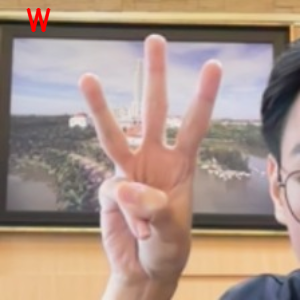

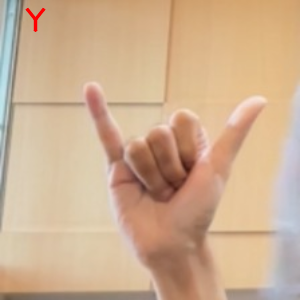

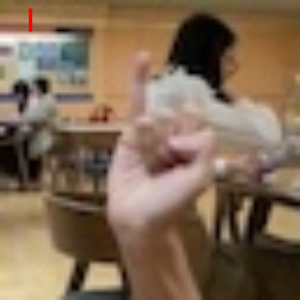

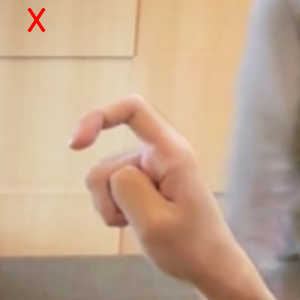

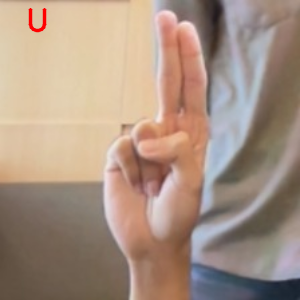

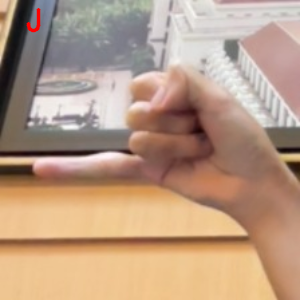

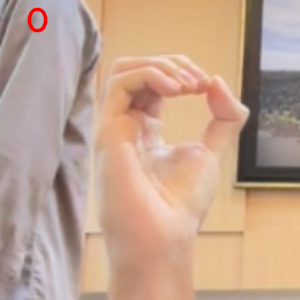

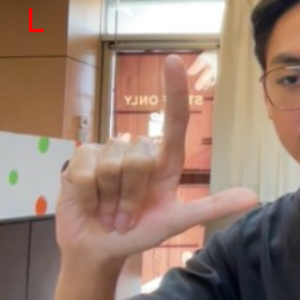

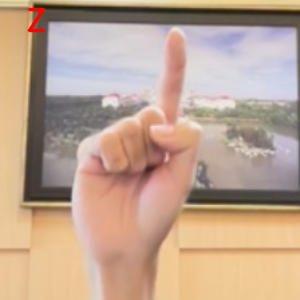

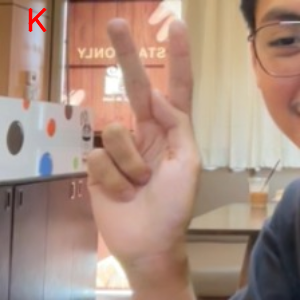

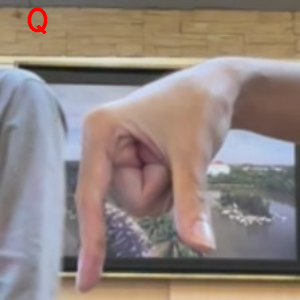

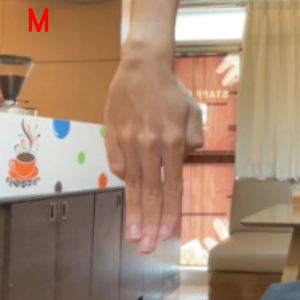

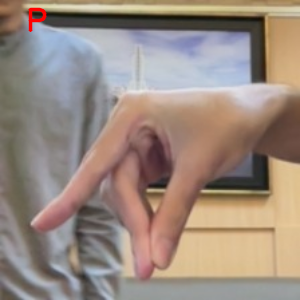

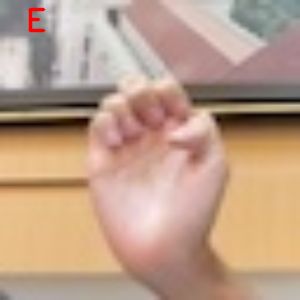

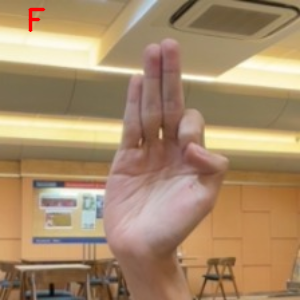

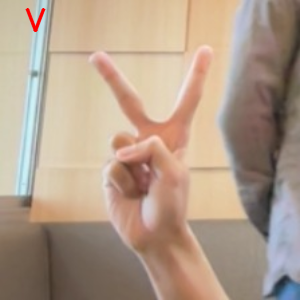

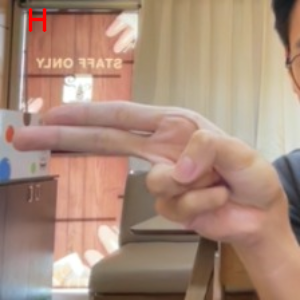

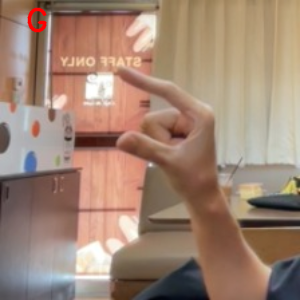

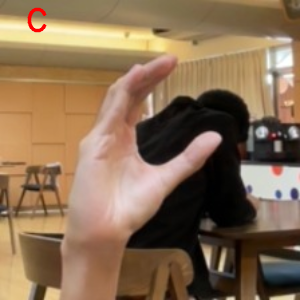

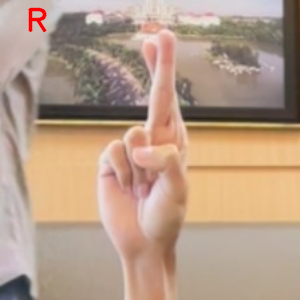

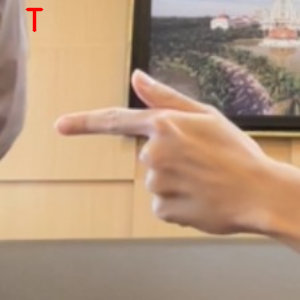

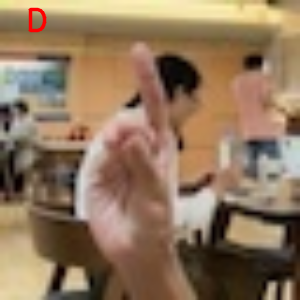

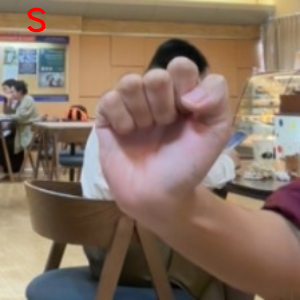

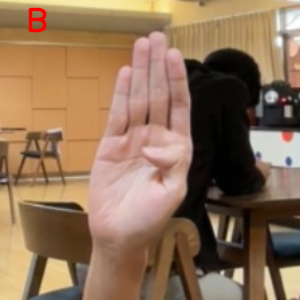

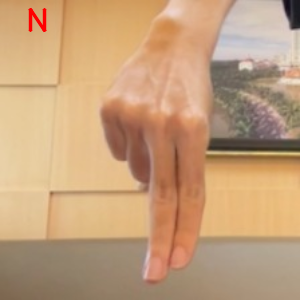

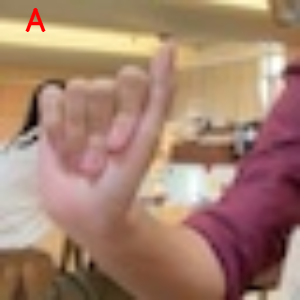

In [13]:
# import os
# from PIL import Image
# from tensorflow.keras.models import load_model
# # categories1 = ['A','B','C']
# model = load_model('asl.h5')  # Replace with your model's path

# def display_prediction(image_path, predicted_label, display_size=(300,300)):
#     img = cv2.imread(image_path)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img = cv2.resize(img,display_size)
#     # Add prediction text on the image
#     cv2.putText(img, f' {predicted_label}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

#     # Display the image
#     display(Image.fromarray(img))

# test_folder_path = "test"

# # img_data=data_preprocess_for_test(test_folder_path,(64,64))
# data = []
# for img_file in os.listdir(test_folder_path):
#         img_path = os.path.join(test_folder_path, img_file) # get full image directory
#         # Open the image, resize, and convert to array
#         img = Image.open(img_path).convert('L')  # Convert to grayscale
#         img = img.resize((64,64))
#         img_array = np.array(img)
        
#         data.append(img_array)

# data = np.array(data).reshape(-1,64,64,1)
# data = data/255.0
# prediction_array = model.predict(data)

# for i in range(len(prediction_array)):
#     predicted_class = np.argmax(prediction_array[i])
#     display_prediction(os.path.join(test_folder_path, os.listdir(test_folder_path)[i]), categories[predicted_class])


In [8]:
import cv2
import mediapipe as mp
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from collections import deque
import time
 
# Load your model and categories
model = load_model('asl.h5')  # Replace with your model's path
# categories = ['A', 'I', 'M', 'N', 'S', 'T']  # Replace with your actual categories
 
# Initialize Mediapipe hand detection
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(max_num_hands=1, min_detection_confidence=0.9, min_tracking_confidence=0.9)
mp_drawing = mp.solutions.drawing_utils
 
# Initialize prediction history deque for prediction smoothing
prediction_history = deque(maxlen=5)  # Keep track of the last 5 predictions
confidence_history = deque(maxlen=5)  # Keep track of the prediction confidence
 
# Initialize deque for hand landmarks smoothing
landmark_history = deque(maxlen=5)  # Store last 5 frames of landmarks
 
# Kalman filter setup for smoothing landmark coordinates (21 hand landmarks)
kalman_filters = [cv2.KalmanFilter(4, 2) for _ in range(21)]
for kf in kalman_filters:
    kf.measurementMatrix = np.array([[1, 0, 0, 0], [0, 1, 0, 0]], np.float32)
    kf.transitionMatrix = np.array([[1, 0, 1, 0], [0, 1, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1]], np.float32)
    kf.processNoiseCov = np.eye(4, dtype=np.float32) * 0.03
 
cap = cv2.VideoCapture(0)
 
frame_count = 0  # Initialize a frame counter
frame_skip = 3   # Set to skip every 3rd frame (you can adjust this value)
 
while True:
    ret, frame = cap.read()
    if not ret:
        break
 
    frame_count += 1  # Increment the frame counter
   
    # Skip frames based on the frame_skip value
    if frame_count % frame_skip != 0:
        continue
 
    frame = cv2.flip(frame, 1)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(rgb_frame)
 
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            # Process each landmark using Kalman filtering for smoothing
            smoothed_landmarks = []
            for i, lm in enumerate(hand_landmarks.landmark):
                # Kalman filter update for smoothing
                kf = kalman_filters[i]
                measured = np.array([[lm.x], [lm.y]], np.float32)
                kf.correct(measured)
                predicted = kf.predict()
 
                smoothed_landmarks.append((predicted[0][0], predicted[1][0]))
 
            # Draw smoothed hand landmarks
            for x, y in smoothed_landmarks:
                cx, cy = int(x * frame.shape[1]), int(y * frame.shape[0])
                cv2.circle(frame, (cx, cy), 5, (0, 255, 0), -1)  # Draw circle at each smoothed landmark
 
            # Get the bounding box of the hand based on smoothed landmarks
            x_min = int(min([lm[0] for lm in smoothed_landmarks]) * frame.shape[1])
            x_max = int(max([lm[0] for lm in smoothed_landmarks]) * frame.shape[1])
            y_min = int(min([lm[1] for lm in smoothed_landmarks]) * frame.shape[0])
            y_max = int(max([lm[1] for lm in smoothed_landmarks]) * frame.shape[0])
 
            # Ensure bounding box is within frame dimensions
            x_min = max(x_min, 0)
            x_max = min(x_max, frame.shape[1])
            y_min = max(y_min, 0)
            y_max = min(y_max, frame.shape[0])
 
            # Crop the hand from the frame
            hand_crop = frame[y_min:y_max, x_min:x_max]
 
            if hand_crop.size > 0:
                try:
                    # Convert to grayscale
                    gray = cv2.cvtColor(hand_crop, cv2.COLOR_BGR2GRAY)
 
                    # Resize to model input size (128x128)
                    resized = cv2.resize(gray, (64, 64))
 
                    # Normalize and reshape
                    normalized = resized / 255.0
                    reshaped = np.reshape(normalized, (-1, 64, 64, 1))
 
                    # Predict the class of the hand
                    predictions = model.predict(reshaped)
                    predicted_class = np.argmax(predictions[0])
                    confidence = np.max(predictions[0])  # Track prediction confidence
 
                    # Append prediction and confidence to history
                    prediction_history.append(predicted_class)
                    confidence_history.append(confidence)
 
                    # Final prediction using the most frequent class with highest average confidence
                    final_prediction = max(set(prediction_history), key=prediction_history.count)
                    avg_confidence = np.mean(confidence_history)
 
                    # Get the label from the categories list
                    label = f"{categories[final_prediction]} ({avg_confidence:.2f})"
 
                    # Define text properties
                    font_scale = 2   # Increase font size
                    font_color = (255, 255, 255)  # White text
                    thickness = 3   # Increase thickness
                    background_color = (0, 0, 0)  # Black background
 
                    # Get the size of the text box
                    text_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)[0]
 
                    # Set the position for the text (bottom center)
                    text_x = int((frame.shape[1] - text_size[0]) / 2)
                    text_y = frame.shape[0] - 10
 
                    # Draw the black rectangle background
                    cv2.rectangle(frame, (text_x - 10, text_y - text_size[1] - 10),
                                  (text_x + text_size[0] + 10, text_y + 10),
                                  background_color, -1)
 
                    # Put the text on the frame
                    cv2.putText(frame, label, (text_x, text_y),
                                cv2.FONT_HERSHEY_SIMPLEX, font_scale,
                                font_color, thickness, cv2.LINE_AA)
                except Exception as e:
                    print(f"Error processing hand crop: {e}")
 
    # Show the frame
    cv2.imshow("Hand Sign Detection", frame)
 
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
 
cap.release()
cv2.destroyAllWindows()

I0000 00:00:1727090108.756448   81530 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2 Pro
W0000 00:00:1727090108.759886   98365 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1727090108.763178   98364 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━

KeyboardInterrupt: 

: 